Please, fill with your data:


| Student | ID |
|--- | --|
|student 1 | UCL-Id1|
|student 2 | UCL-Id2|

# Practical Homework 2 --- The Las Vegas $n$-Queens

In this homework we are going to analyse the Las Vegas $n$-Queens algorithm.
Imagine to have a $n\times n$ chessboard and exactly $n$ queens that we want to place on the board **safely**: they should be unable to attack each other (queens can attack other pieces horizontally, vertically and diagonally at any distance).

In order to find the **safe** state we have a list of strategies:

- **backtrack:** the quest starts at a given state and enumerates all the states one after another.
- **random:** at each iteration a random state is generated from zero

In [1]:
def print_board(size=8):
    for i in range(size):
        print('│', end='')
        for j in range(size // 2):
            if i%2 == 0:
                print('██  ', end='')
            else:
                print('  ██', end='')
        print('│')
        
print_board(8)

│██  ██  ██  ██  │
│  ██  ██  ██  ██│
│██  ██  ██  ██  │
│  ██  ██  ██  ██│
│██  ██  ██  ██  │
│  ██  ██  ██  ██│
│██  ██  ██  ██  │
│  ██  ██  ██  ██│


## Exercise 1

Compare the number of *moves* you need (on average) in the two strategies **backtrack** and **random** before reaching the *safe* state for different values of $n$.
In particular:

- **backtrack:**
    1. start placing the first queen in the first row of the first column;
    1. recursively place the following queen in the first *safe* row of the following column until no more queens can be placed in a *safe* way;
    1. (backtrack) move the last queen to the next *safe* place and restart from point 2; if no safe place is left remove the queen and repeat this point.
- **random:**
    1. place the first queen randomly in the first column;
    1. place the following queen in a random *safe* place on the following column until no *safe* places are available on next column
    1. if the number of queens on the board is less than $n$, restart from the beginning

Plot the number of *moves* as a function of the number $n$ of queens.
A *move* is defined as adding a new queen to the board (not removing it).

Which is the best strategy?

#### helper function: is_allowed
- it is used in backtrack, random and hybrid algorithms

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def is_allowed(board, row, col):
    """ Takes a number(length of one side of board) and checks if a queen can be placed on 
    given cell board[row][col] verifiying if the cell is under attack of the queens 
    in the previous columns (from 0 to col -1)
    """
    # Return false if there is a queen on the left side of given row 
    for i in range(col): 
        if board[row][i] == 1: return False

    # Return false if there is a queen on upper diagonal of left side 
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)): 
        if board[i][j] == 1: return False

    # Return false if there is a queen on lower diagonal of left side 
    for i, j in zip(range(row, board.shape[0], 1), range(col, -1, -1)): 
        if board[i][j] == 1: return False
  
    return True

#### Backtrack algorithm: `n_queen_bt`

In [4]:
def n_queen_bt(size):
    """calls the n_queen_backtrack to output the result of placement.
    takes a number(lenght of one side of the board)
    returns a tuple of a boolean (true if queens can be placed) and total number of moves"""
    
    # create initial board
    board = np.zeros([size, size])
    
    # number of rows and cols
    length = board.shape[1]
    
    # count moves
    move_count = 0
        
    def backtrack(board, col):
        """takes a matrix(board) and a column number and returns a boolean
        indicating if the queens can be placed or not"""
        
        # keep track of move count in nonlocal scope
        nonlocal move_count
        # increment move_count for each recursive call
        move_count += 1
                    
        # If all queens are placed ie 
        # if the current column reach the end of board return true
        if col >= length: return True
    
        # loop over all the rows of the given column and
        # verify if the current queen can be placed by calling is_allowed function
        for i in range(length): 
            # if is_allowed returns true for the current row
            # place the current queen in board[i][col]
            # by assigning the cell value to 1
            if is_allowed(board, i, col): 
                board[i][col] = 1                        
                # continue recursively placing the other queens in next cols
                # if placement of all the queens is possible return true
                if backtrack(board, col + 1) == True: return True

                # after placing the queen in the current cell if the recursion does not 
                # output True then backtrack by assigning the cell to zero(0)and
                # continue looping on the remaining rows 
                board[i][col] = 0
            
        return False
    
    if backtrack(board, 0) == False: 
        print ("No solution") 
        return False
    
    return True, move_count

In [5]:
# list of number of queens (also side of the board)
num_queen_lst = list(range(4, 30))
print(num_queen_lst)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


#### number of moves in the backtrack algorithm
- Since it takes to much time and moves after 20 queens for backtrack algorithm we will only display the moves and time for till 20 queens

In [6]:
# number of moves in the backtrack algorithm: n_queen_bt
move_count_lst_bt = [n_queen_bt(num)[1] for num in num_queen_lst[:-9]]
print(move_count_lst_bt)

[9, 6, 32, 10, 114, 42, 103, 53, 262, 112, 1900, 1360, 10053, 5375, 41300, 2546, 199636]


#### Backtrack algorithm's moves plot

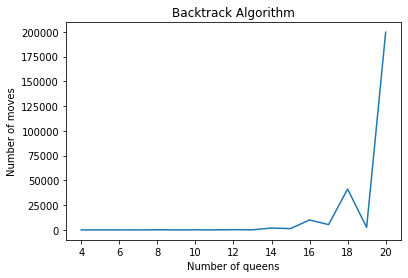

In [7]:
# plot number of queens vs moves 
plt.plot(num_queen_lst[:-9], move_count_lst_bt)

plt.xlabel("Number of queens")
plt.ylabel("Number of moves")
plt.title("Backtrack Algorithm")
plt.show()

#### Random algorithm: `random_move_count`

In [8]:
def random_move_count(num):
    """takes a number(number of queen) and counts the moves in n_queen_random function 
    till a solution can be found
    """
    # count moves
    move_count = 0
    
    def n_queen_random(board, col):
        """takes a matrix(board) and a column number and returns a boolean
        indicating if all the queens can be placed or not"""
        
        # keep track of move count in nonlocal scope
        nonlocal move_count
        # increment move_count for each recursive call
        move_count += 1
        
        # number of rows and cols
        length = board.shape[1]

        # termination conditions:   
        if col >= length: return False
        # if the number of queens on the board is equal to expected number of queens
        # return True
        if np.sum(board)== length: return True

        # create a list of safe cells for the current column
        # and choose a row randomly
        rand_lst = []
        for i in range(length): 
            # if is_allowed returns true for the current row
            # add that row in rand_lst 
            if is_allowed(board, i, col):
                rand_lst.append(i)

        # if there is no safe space(empty rand_lst) return False
        if not rand_lst: return False

        # choose a random safe row
        row_rand = random.choice(rand_lst)

        # place the next queen in row_rand and assign to 1
        board[row_rand][col] = 1            

        # continue recursively placing the other queens in next cols    
        if n_queen_random(board, col + 1) == True: return True
        
        return False

    # while codition
    cond = True
    while cond:
        board = np.zeros([num, num])
        
        # as long as n_queen_random outputs False loop continues
        cond = not n_queen_random(board, 0)
    
    return move_count        

In [ ]:
# number of moves in the random algorithm: random_move_count
move_count_lst_rand = [random_move_count(num) for num in num_queen_lst[:-5]]
print(move_count_lst_rand)

#### Random algorithm's plot

In [ ]:
# plot number of queens vs moves 
plt.plot(num_queen_lst, move_count_lst_rand)

plt.xlabel("Number of queens")
plt.ylabel("Number of moves")
plt.title("Random Algorithm")
plt.show()

## Write here your comments for exercise1 !!!

## Exercise 2

In the previous exercise the random generation of numbers is the bottleneck for the **random** strategy.

Compare now the running time required by the two methods to find the *safe* state (using for example `time.time`) and plot it as a function of the number $n$ of queens.
What changes?

In [ ]:
time_bt = []
time_rand = []

# timing bactrack algo (deterministic)
for num in num_queen_lst[:-9]:
    t_start_bt = time.time()
    n_queen_bt(num)
    t_end_bt = time.time()
    time_bt.append(t_end_bt - t_start_bt)
    
# timing random algo
# since there is randomness we take the average of 1000 trials
for i in range(1000):
    for num in num_queen_lst:
        t_start_rand = time.time()
        random_move_count(num)
        t_end_rand = time.time()
        time_rand.append(t_end_rand - t_start_rand)

# average time for random algorithm
time_rand = [time_rand/100 for time in time_rand]

In [ ]:
# round the times
round_bt_times = [round(num, 5) for num in time_bt]
round_rand_times = [round(num, 5) for num in time_rand]
print("Backtracking algorithm times from 4 to 24 queens:", "\n", round_bt_times, "\n")
print("Random algorithm times from 4 to 24 queens:","\n", round_rand_times)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)

ax1.plot(num_queen_lst[:10], time_bt[:10])
ax1.set_title("Backtrack algorithm 4-13 queens")
ax1.set_ylabel("Time")


ax2.plot(num_queen_lst[:10], time_rand[:10])
ax2.set_title("Random algorithm 4-13 queens")
ax2.set_ylabel("Time");

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)

ax1.plot(num_queen_lst[10:], time_bt[10:])
ax1.set_title("Backtrack algorithm 13-24 queens")
ax1.set_ylabel("Time")

ax2.plot(num_queen_lst[10:], time_rand[10:])
ax2.set_title("Random algorithm 13-24 queens")
ax2.set_ylabel("Time");

### Write here your comments for exercise 2 !!!

## Exercise 3

We want to check a mixed approach: for a given number $n$ of queens, place randomly only the first half of them (reducing drastically the state space left) and search with the **backtrack** algorithm the rest of them.

Compare the (average) time and number of *moves* to the previous results, how does it compare to the *pure* strategies?

**Note:**
- Since the first half of the queens are placed by the random algorithm, backtrack algorithm has to start placing the queens by considering the positions of the queens of the fist part and at the end if there is no solution it cannot backtrack till the beginning of the board so for a solution, the algorithm should start from the scratch (from the random part again).

In [ ]:
def hybrid(num):
    """takes a number(number of queen) and counts the moves in n_queen_random function 
    till a solution can be found
    """
    # create initial board
    #board = np.zeros([num, num])
    
    # number of rows and cols
    #length = board.shape[1]
    
    # count moves
    move_count = 0
    
    def random_func(board, col):
        """takes a matrix(board) and a column number and returns a boolean
        indicating if all the queens can be placed or not"""
        
        # keep track of move count in nonlocal scope
        nonlocal move_count
        # increment move_count for each recursive call
        move_count += 1
        
        # number of rows and cols
        length = board.shape[1]

       # termination conditions:
        if col >= length//2: return False
        # if the number of queens on the board is equal to 
        # expected number of queens return True
        if np.sum(board)== length//2: return True

        # create a list of safe cells for the current column
        # and choose a row randomly
        rand_lst = []
        for i in range(num): 
            # if is_allowed returns true for the current row
            # add that row in rand_lst 
            if is_allowed(board, i, col):
                rand_lst.append(i)

        # if there is no safe space(empty rand_lst) return False
        if not rand_lst: return False

        # choose a random safe row
        row_rand = random.choice(rand_lst)

        # place the next queen in row_rand and assign to 1
        board[row_rand][col] = 1            

        # continue recursively placing the other queens in next cols    
        if random_func(board, col + 1) == True: return True
        
        return False
    
    def backtrack_func(board, col):
        """takes a matrix(board) and a column number and returns a boolean
        indicating if the queens can be placed or not"""
        
        # keep track of move count in nonlocal scope
        nonlocal move_count
        # increment move_count for each recursive call
        move_count += 1
                    
        # If all queens are placed ie 
        # if the current column reach the end of board return true
        if col >= num: return True
    
        # loop over all the rows of the given column and
        # verify if the current queen can be placed by calling is_allowed function
        for i in range(num): 
            # if is_allowed returns true for the current row
            # place the current queen in board[i][col]
            # by assigning the cell value to 1
            if is_allowed(board, i, col): 
                board[i][col] = 1                        
                # continue recursively placing the other queens in next cols
                # if placement of all the queens is possible return true
                if backtrack_func(board, col + 1) == True: return True

                # after placing the queen in the current cell if the recursion does not 
                # output True then backtrack by assigning the cell to zero(0)and
                # continue looping on the remaining rows 
                board[i][col] = 0
            
        return False
    
    # while codition for random part
    break_cond = 0
    while break_cond < 10000:
        # create a new board
        board = np.zeros([num, num])
        break_cond +=1
        # as long as n_queen_random outputs False loop continues
        if  random_func(board, 0) == True: 
            break
    print("first random part is succesfull")

    # starting column index for backtrack algo
    bt_start_col = num//2
    # as long as backtrack_func returns false call the random_func in while loop
    # to find a solution in the first part
    while backtrack_func(board, bt_start_col) == False:
        print("START FROM SCRATCH")
        
        # while codition for random part
        break_cond = 0
        while break_cond < 10000:
            # create a new board
            board = np.zeros([num, num])
            break_cond +=1
            # as long as n_queen_random outputs False inner loop continues
            if  random_func(board, 0) == True: 
                break
        print("second random is successfull")
    print("TOTAL SUCCESS")
            
    # uncomment to print the board
    print(board)
    
    # return True and the number of count
    return True, move_count     

In [ ]:
time_hybrid =[]
    
# timing hybrid
# since there is randomness we take the average of 1000 trials
for i in range(1000):
    for num in num_queen_lst:
        t_start_hybrid = time.time()
        random_move_count(num)
        t_end_hybrid = time.time()
        time_rand.append(t_end_hybrid - t_start_hybrid)
        
time_hybrid = [time/100 for time in time_hybrid]

### Write here your comments for exercise 3 !!!

In [ ]:
hybrid(5)